# Intro to NLP with spaCy

This notebook is a hands-on introduction to NLP with [spaCy](https://spacy.io/), a library by [explosion.ai](https://explosion.ai/). 

> spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

spaCy helps you
- work with a lot of text _(corpus)_
- preprocess text
- extract information, like
    - what is the corpus about? 
    - which texts are similar to each other?
    - which people, companies, countries etc. are mentioned? 
    - who says what to whom?

spaCy handles many tasks commonly associated with building an end-to-end natural language processing pipeline:
- tokenization and sentence boundary detection
- normalization (lowercasing, stemming/lemmatization...)
- POS tagging
- dependency parsing
- NER

Why spaCy?
- batteries included (stopwords, token probabilities, word vectors)
- easy scaling from prototyping to deployment
- visualization

spaCy (out of the box) is not for:
- downstream tasks (topic modeling, classification, chatbots, ...)
- niche preprocessing tasks (coreference resolution, ...)
- ...
- but, these use cases can be addressed with plug-ins and extensions



## 1. Getting started

### 1.1. Setup

You need two things to run spaCy:
- the python library spaCy itself (which defines how your programming interface)
- a trained model for the language of choice (which performs e.g. tagging and parsing)

In [ ]:
# !pip3 install spacy

In [ ]:
# !python3 -m spacy download en_core_web_sm

It is two commands instead of one. However, with this comes great benefit. Namely, with a one-word difference in your import statements, you can swap the model that you want to use.

For example you can use a smaller but quicker model for prototyping, and swap it for a larger, more accurate model for production. 

Before you run spacy, you have to import it and load the model.

In [182]:
import spacy
nlp = spacy.load('en_core_web_sm')

Case in point, you can download a more sophisticated (but space- and memory-hungry, and slower) model and load it instead of the smaller one. Suffixes sm, md, lg give you a hint of the size of the model. You can find the models available on the website.

In [ ]:
# !python3 -m spacy download en_core_web_md

BTW, you can also load the model directly

In [183]:
import en_core_web_md
nlp = en_core_web_md.load()

a few other libraries and imports

In [ ]:
# !pip install matplotlib pandas bs4

In [124]:
import spacy
from spacy import displacy
import pandas as pd
import re
from bs4 import BeautifulSoup
from collections import Counter
from itertools import islice
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1.2 Using spacy

This is a normal python string

In [125]:
doc = "Why does Donald Trump always wear black suits? Because he is mourning for his brain."
doc

'Why does Donald Trump always wear black suits? Because he is mourning for his brain.'

This is a string on spaCy

In [126]:
spacy_doc = nlp(doc)
spacy_doc

Why does Donald Trump always wear black suits? Because he is mourning for his brain.

They look mostly the same on the surface, but the spaCy version is much richer in information and easier to handle in an intuitive way. What happened in the call above, is that spaCy applied a whole host of taggers and indexing to the string, so that the information that is typically needed in text mangling is readily available.

For example, spaCy has already split the string into words. One instance of a word is called token. If you iterate over the document you get its tokens:

In [127]:
for token in spacy_doc:
    print(token)

Why
does
Donald
Trump
always
wear
black
suits
?
Because
he
is
mourning
for
his
brain
.


Similarly, spaCy has already identified the sentences that make up the larger string, and stored (links to) them in an attribute of the document.

In [128]:
for sentence in spacy_doc.sents:
    print(sentence)

Why does Donald Trump always wear black suits?
Because he is mourning for his brain.


Sentence and word tokenization are almost invariably a step in text analysis. SpaCy gives instant access to the final product of several "boilerplate" steps of computation. 

However, spaCy also gives you to less trivial annotations of a string, such as identifying groups of words that make up what we would identify as a person:

In [129]:
spacy_doc.ents

(Donald Trump,)

## 2 How spaCy represents text (data structures)

There are three "granularities" in spaCy:
- the document, the largest cohesive unit of observation that you make spaCy parse
- the span, a contiguous subsequence of tokens within a document
- the token, a single instance of a word

In [130]:
print(spacy_doc, type(spacy_doc), )
print(spacy_doc[:], type(spacy_doc[:]),)
print(spacy_doc[0], type(spacy_doc[0]), )


Why does Donald Trump always wear black suits? Because he is mourning for his brain. <class 'spacy.tokens.doc.Doc'>
Why does Donald Trump always wear black suits? Because he is mourning for his brain. <class 'spacy.tokens.span.Span'>
Why <class 'spacy.tokens.token.Token'>


Note that the second object is a span, even if it has all of the tokens in the document. Since we accessed it as a sequence, it is returned to us as a span. You might have guessed: sentences are spans too.

In [131]:
type(list(spacy_doc.sents)[0])

spacy.tokens.span.Span

### 2.1 Exploring tokens

Most analyses focus on tokens. You can access tokens by direct index on the document or span.

In [132]:
token = spacy_doc[3]

SpaCy provides a host of information about a token, e.g. if it is a number, punctuation, letter, stopword, ...

In [133]:
list(filter(lambda x: not x.startswith("_"),  dir(token)))

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'morph',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'remove_extension',
 'right_edge',
 'rights',
 'sent',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 

That is a lot of information, it is easy to get lost. SpaCy offers a few pointers to position yourself, such as links to the original document the token belongs to:

In [134]:
token.doc

Why does Donald Trump always wear black suits? Because he is mourning for his brain.

or positional index within the document (the token is in the i-th position of its document)

In [135]:
assert token == spacy_doc[token.i]

also, spaCy has a few ways of representing the token's string

In [187]:
token.text, token.string, token.orth_, token.lemma_, token.whitespace_

('wear', 'wear ', 'wear', 'wear', ' ')

one convention that is useful to know is that for many tags, there are two versions:
- with an undescore, when the value is a human-readable label, e.g. pos_
- without the underscore, when the value is an integer, e.g. pos

Having integer representation for the tags makes for more efficient code but less accessible to debugging. spaCy gives you the choice, and makes it easy to switch from one representation to the other

In [137]:
token.pos, token.pos_

(96, 'PROPN')

Among the interesting information in a token, an interesting one is the (log) probability of the token in "standard English"

In [138]:
token.prob

-20.0

### 2.2 Word vectors

spaCy also already offers word vectors for a large vocabulary

In [139]:
token.vector

array([-4.2175e-01,  1.8711e-01,  3.4765e-01, -2.8588e-01, -8.3932e-02,
        1.1277e-02,  2.1249e-02,  2.6343e-01,  2.2187e-01,  1.1753e+00,
       -9.2204e-02, -6.5978e-01,  1.4032e-01,  1.9669e-01,  5.0662e-02,
        1.1238e-01, -4.0031e-01, -3.4718e-01,  1.0501e-02,  1.9059e-01,
        4.7089e-02,  1.2648e-01,  1.2395e-01, -1.4647e-01,  4.9865e-01,
        9.0596e-02, -2.4599e-01, -8.2896e-02, -3.2482e-01, -1.5548e-03,
        1.3087e-01,  2.1520e-01,  1.9742e-01,  1.2051e-01,  4.5222e-01,
        4.4882e-01,  1.0680e-01,  1.3475e-02, -3.2072e-01,  6.2445e-02,
       -4.8712e-01, -1.6536e-01, -2.8725e-01,  6.0925e-01, -1.3591e-01,
        9.0801e-03, -2.9597e-01, -3.1342e-01,  1.7717e-02,  3.7069e-01,
        1.5938e-01,  5.0631e-01, -3.2633e-03, -3.1040e-01, -5.2806e-01,
        1.9271e-01,  8.9184e-02,  4.7455e-01,  4.1562e-02, -2.1373e-01,
       -3.6329e-01,  3.6512e-01,  9.2584e-02, -5.3587e-01,  2.7139e-01,
       -2.7306e-02, -6.8992e-02,  8.2103e-02,  2.1897e-02, -4.74

The vectors work the way one would assume

In [189]:
doc = nlp(u"Apples and oranges are somewhat similar. Limes and oranges are more similar.")

apples = doc[0]
oranges = doc[2]
limes = doc[7]

apples, oranges, limes

(Apples, oranges, Limes)

In [142]:
apples.similarity(oranges)

0.77809423

In [143]:
limes.similarity(oranges)

0.7997179

for example, one can compute the similarity of apples and oranges, and of limes and oranges, and find out that limes are more similar to oranges than apples are.

### 2.3 Moving around the dependency tree

Let's zoom out from the narrow view of the single token. Enough with the dull linear scanning of a sentence. Behold, the syntactic dependency parse.

In [144]:
displacy.render(list(spacy_doc.sents)[0], 
                style="dep", 
                options = {"compact": True, 
                           "bg": "#09a3d5",
                           "color": "white", })

Take a moment to appreciate how nice it is to have a visual representation of your data. It makes debugging your code much easier.

That said, a dependency parse of a sentence is a tree rooted at its main verb. If you take the verb "wear", and imagine to pull it upwards, you would see the rest of the sentence dangling from it, with directed edges pointing at its children, children-of-children, etc.

You can move upwards from a token to its parent token in the dependency tree via its `head` attribute.

In [145]:
def walkToTheRoot(token):
    dep_labels = []
    while token.head != token:
        dep_labels.append((token.orth_, token.dep_))
        token = token.head
    return dep_labels

In [146]:
walkToTheRoot(spacy_doc[2])

[('Donald', 'compound'), ('Trump', 'nsubj')]

the root is by convention the token that has itself as head

In [147]:
root=None
for token in spacy_doc:
    if token == token.head:
        root = token
        break

root

wear

You can also descend from a token using its `children` attribute. 
Now, you can move around the tree with standard tree transversal algorithms.

In [150]:
def dfs(root):
    for child in root.children:
        dfs(child)
        print(child)

In [151]:
dfs(root)

Why
does
Donald
Trump
always
black
suits
?


You also have views that are in-between index- and dependency-based scanning of a sentence. For example, you have easy access to the dependents of a token that are in the left subtree (i.e. that have lower indices in the sentence).

In [148]:
list(root.lefts)

[Why, does, Trump, always]

or just jump to the earliest position in the sentence that fits those criteria

In [149]:
root.left_edge

Why

### 2.4 Notable Spans

In [152]:
for noun_phrase in spacy_doc.noun_chunks:
    print(noun_phrase)

Donald Trump
black suits
he
his brain


In [153]:
for entity in spacy_doc.ents:
    print("{} is an entity of type {}".format(entity, entity.label_))


Donald Trump is an entity of type PERSON


In [154]:
displacy.render(list(spacy_doc.sents)[0], 
                style="ent", )

## 3 Extensions

spaCy has a number of extensions built for it, check them out at:
https://spacy.io/universe
    
(beware, most are for python 3.6+ and WILL screw up your installation if you do not follow that indication)

The typical way one uses ready-made extensions is by loading them as components to spaCy's processing pipe, before parsing your documents. You can easily build your own extensions too.

The example below comes from spaCy's own website. It implements a naive NER system that identifies named entities when they exactly match a lowercased sequence of words, e.g. san+francisco and san+fran. You can also add an identifier to the patterns, so as to make multiple patterns match the same entity, in this case san-francisco.

In [199]:
from spacy.lang.en import English
from spacy.pipeline import EntityRuler

nlp = English()
ruler = EntityRuler(nlp)
patterns = [{"label": "ORG", "pattern": "Apple", "id": "apple"},
            {"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}], "id": "san-francisco"},
            {"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "fran"}], "id": "san-francisco"}]
ruler.add_patterns(patterns)
nlp.add_pipe(ruler)

doc1 = nlp("Apple is opening its first big office in San Francisco.")
print([(ent.text, ent.label_, ent.ent_id_) for ent in doc1.ents])

doc2 = nlp("Apple is opening its first big office in San Fran.")
print([(ent.text, ent.label_, ent.ent_id_) for ent in doc2.ents])

[('Apple', 'ORG', 'apple'), ('San Francisco', 'GPE', 'san-francisco')]
[('Apple', 'ORG', 'apple'), ('San Fran', 'GPE', 'san-francisco')]


Another way to change the capabilities of spaCy is to load different models altogether. E.g., here is a model in German.

In [156]:
# !python3 -m spacy download de

In [157]:
de_nlp = spacy.load('de')

In [160]:
de_doc=de_nlp("Mein Name ist Matthias und mein Deutsch ist scheiße")

In [161]:
for ent in de_doc.ents:
    print(ent.string, ent.label_)

Matthias  PER
Deutsch  MISC


## 4 Example data exploration

some real data from https://osf.io/qhm5z/

> Clarke I, Grieve J (2019) Stylistic variation on the Donald Trump Twitter account: A linguistic analysis of tweets posted between 2009 and 2018. PLoS ONE 14(9): e0222062.  

[Link to the paper](https://doi.org/10.1371/journal.pone.0222062)

In [162]:
# !wget -O trump_tweets.txt https://osf.io/jw5ad/download

In [163]:
trump_tweets = pd.read_csv('trump_tweets.txt', sep='\t')
trump_tweets.head()

,STATUSID,DATE,TIME,SOURCE,Retweet,Favourite,TWEETS
0,· 965971586913374208,02-20-2018,15:29:07,Twitter for iPhone,19693,79159,1. ....cameras running. Another False Accu...
1,· 965968309358333952,02-20-2018,15:16:06,Twitter for iPhone,21676,96352,"2. A woman I don’t know and, to the best o..."
2,· 965943827931549696,02-20-2018,13:38:49,Twitter for iPhone,16216,77951,3. I have been much tougher on Russia than...
3,· 965937068907073536,02-20-2018,13:11:58,Twitter for iPhone,20211,79178,4. Hope Republicans in the Great State of ...
4,· 965935035328155649,02-20-2018,13:03:53,Twitter for iPhone,10176,51701,5. Matt Schlapp and CPAC are getting ready...


quick text beautification to make the parser more effective

In [164]:
unescape_html = lambda x: BeautifulSoup(x).get_text().strip() # remove things like &amp
remove_urls = lambda x: re.sub("http(.+)?(\W|$)", ' ', x) # remove urls
normalize_spaces = lambda x: re.sub("[\n\r\t ]+", ' ', x) # remove subsequent spaces and newlines
remove_leading_digits = lambda x: re.sub("\d+\.", "", x) # remove the "1.   " that prefixes the data

In [165]:
def preprocess(x):
    x = remove_leading_digits(x)
    x = unescape_html(x)
    x = remove_urls(x)
    x = normalize_spaces(x)
    
    return x.strip()

In [166]:
trump_tweets['text'] = trump_tweets.TWEETS.apply(preprocess)

let's use a medium-sized model

In [200]:
nlp = en_core_web_md.load()

and let's consider the first 2000 tweets as a single document, for the sake of simplicity. It is trivial to parse each tweet individually for the entire collection, and modify the code below to work on a list of documents instead of on one large document.


In [167]:
trump_doc = nlp('\n'.join(trump_tweets.head(2000).text.values))

what are the most common words?

In [168]:
Counter(map(lambda x:x.lemma_.lower(), 
            filter(lambda x: not (x.is_stop or x.is_punct or x.is_space),
                trump_doc))).most_common(10)

[('great', 481),
 ('people', 188),
 ('big', 181),
 ('news', 176),
 ('thank', 163),
 ('america', 162),
 ('fake', 156),
 ('tax', 151),
 ('country', 144),
 ('year', 142)]

what type of entities does he talk about?

In [169]:
set([w.label_ for w in trump_doc.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

which places does he talk about?

In [171]:
GPE_counts = Counter(ent.lemma_.lower() for ent in trump_doc.ents if ent.label_ == 'GPE')

In [172]:
GPE_counts.most_common(10)

[('america', 127),
 ('u.s.', 79),
 ('russia', 53),
 ('china', 49),
 ('north korea', 47),
 ('the united states', 31),
 ('puerto rico', 27),
 ('florida', 26),
 ('alabama', 25),
 ('usa', 21)]

In [173]:
GPE_counts.most_common()[::-1][:10]

[('new york', 1),
 ('alexandria', 1),
 ('whitewater', 1),
 ('lottery', 1),
 ('kuwait', 1),
 ('ms', 1),
 ('the#uswomensopen', 1),
 ('sanctuary', 1),
 ('middle class', 1),
 ('jamaica', 1)]

which organizations?

In [174]:
ORG_counts = Counter(ent.lemma_.lower() for ent in trump_doc.ents if ent.label_ == 'ORG')

In [175]:
ORG_counts.most_common(10)

[('🇸', 77),
 ('fbi', 49),
 ('obamacare', 48),
 ('senate', 43),
 ('congress', 38),
 ('trump', 35),
 ('fake news', 31),
 ('the fake news', 26),
 ('healthcare', 25),
 ('@whitehouse', 23)]

let's see what he has to say about certain named entities, e.g. entities that match a certain regex

In [176]:
def sentences_w_entity_regex(trump_doc, pattern):
    for entity in trump_doc.ents:
        if re.match(pattern, entity.string):
            yield entity.sent

some words on Obama[care]

In [177]:
for sentence in islice(sentences_w_entity_regex(trump_doc, re.compile("obam.*", re.I)), 10):
    print(sentence.text.strip())

I have been much tougher on Russia than Obama, just look at the facts.
Big difference from those days when President Obama held the White House.
The President Obama quote just before election.
Obama was President up to, and beyond, the 2016 Election.
Now that Adam Schiff is starting to blame President Obama for Russian meddling in the election, he is probably doing so as yet another excuse that the Democrats, lead by their fearless leader, Crooked Hillary Clinton, lost the 2016 election.
Obama was President, knew of the threat, and did nothing.
Never gotten over the fact that Obama was able to send $7 Billion Dollars in CASH to Iran and nobody in Congress, the FBI or Justice called for an investigation!
“President Trump reversed the policies of President Obama, and reversed our economic decline.”
While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 

some words on crooked people

In [178]:
for sentence in islice(sentences_w_entity_regex(trump_doc, re.compile("crooked", re.I)), 10):
    print(sentence.text.strip())

That’s because he thought Crooked Hillary was going to win
Now that Adam Schiff is starting to blame President Obama for Russian meddling in the election, he is probably doing so as yet another excuse that the Democrats, lead by their fearless leader, Crooked Hillary Clinton, lost the 2016 election.
General McMaster forgot to say that the results of the 2016 election were not impacted or changed by the Russians and that the only Collusion was between Russia and Crooked H, the DNC and the Dems.
All tied into Crooked Hillary.
Many people in our Country are asking what the “Justice” Department is going to do about the fact that totally Crooked Hillary, AFTER receiving a subpoena from the United States Congress, deleted and “acid washed” 33,000 Emails?
So General Flynn lies to the FBI and his life is destroyed, while Crooked Hillary Clinton, on that now famous FBI holiday “interrogation” with no swearing in and no recording, lies many times...and nothing happens to her?
“Had the informatio

Sources say that when tweets from Android, it is him directly, whereas when from iPhone, it is his staff. Let's see some differences 
https://twitter.com/tvaziri/status/762005541388378112

In [218]:
trump_tweets.groupby('SOURCE').size()

SOURCE
Facebook                      105
Instagram                     133
Media Studio                  126
Mobile Web (M5)                55
Neatly For BlackBerry 10        5
Periscope                       7
TweetDeck                     483
TwitLonger Beta               404
Twitlonger                     23
Twitter Ads                    97
Twitter Mirror for iPad         1
Twitter QandA                  10
Twitter Web Client          11252
Twitter for Android          4659
Twitter for BlackBerry         96
Twitter for Websites            1
Twitter for iPad               48
Twitter for iPhone           4224
Vine - Make a Scene            10
dtype: int64

Let's compare the distribution of POS on 2000 tweets from each source.

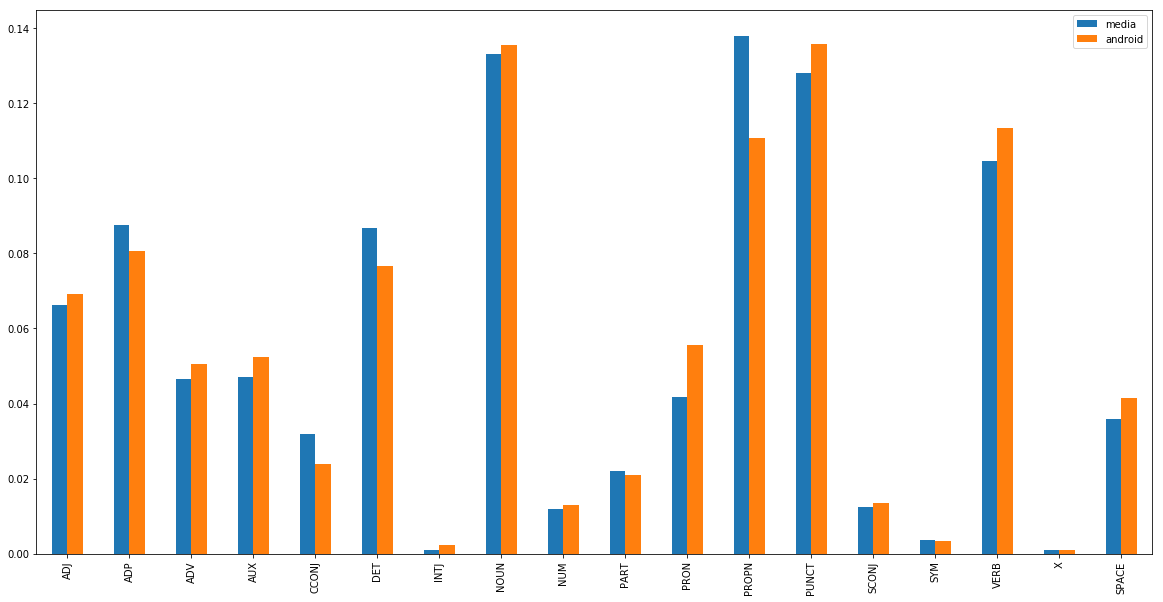

In [220]:
media_tweets = trump_doc = nlp('\n'.join(trump_tweets[trump_tweets.SOURCE=='Twitter for iPhone'].head(2000).text.values))
android_tweets = trump_doc = nlp('\n'.join(trump_tweets[trump_tweets.SOURCE=='Twitter for Android'].head(2000).text.values))

media_tweetsPOS = pd.Series(media_tweets.count_by(spacy.attrs.POS))/len(media_tweets)
android_tweetsPOS = pd.Series(android_tweets.count_by(spacy.attrs.POS))/len(android_tweets)


tagDict = {w.pos: w.pos_ for w in media_tweets} 
df = pd.DataFrame([media_tweetsPOS, android_tweetsPOS], index=['media', 'android'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar', figsize=(20, 10))

What is been made?

In [231]:
def verbObjects(doc, verb):
    verb_objects = list()
    for tok in doc:
        if tok.pos_.startswith('V') and tok.lemma_.lower()==verb:
            for child in tok.children:
                if child.dep_ in ['xcomp', 'dobj', 'ccomp']:
                    verb_objects.append(''.join(i.string for i in child.subtree).strip())
    return Counter(verb_objects).most_common(10)
        

In [232]:
verbObjects(android_tweets, 'make')

[('AMERICA GREAT', 67),
 ('America', 6),
 ('AMERICA SAFE AND', 5),
 ('AMERICA SAFE', 4),
 ('so many mistakes', 3),
 ('America Great', 3),
 ('Great', 2),
 ('AMERICA SAFE & GREAT', 2),
 ('a big speech', 2),
 (', phony facts', 1)]

In [233]:
verbObjects(media_tweets, 'make')

[('AMERICA GREAT', 42),
 ('a deal', 11),
 ('America', 5),
 ('Great', 2),
 ('such a difference', 2),
 ('us a powerhouse', 1),
 ('a phony collusion with the Russians story', 1),
 ('some of the worst Trade Deals in world history', 1),
 ('it really special', 1),
 ('stories about me', 1)]

In [224]:
def characterAdjectives(text, character):
    adjectives = []
    for word in text: 
        if character in word.string:
            for child in word.children: 
                if child.pos_ == 'ADJ': 
                    adjectives.append(child.string.strip())
    return Counter(adjectives).most_common(10)

In [225]:
characterAdjectives(android_tweets, 'Hillary')

[('Crooked', 18), ('worst', 1), ('-', 1)]

In [226]:
characterAdjectives(media_tweets, 'Hillary')

[('Crooked', 3), ('HAPPENED”“How', 1)]

In [227]:
def parentVerbsForPerson(sentences):
    from collections import defaultdict
    counts = defaultdict(lambda: defaultdict(int))
    for sentence in sentences:
        for ent in sentence.ents:
            if ent.label_ == 'PERSON' and ent.root.head.pos_ == "VERB":
                counts[ent.orth_][ent.root.head.lemma_] += 1
    return counts

In [230]:
parentVerbsForPerson(islice(android_tweets.sents, 1000))

defaultdict(<function __main__.parentVerbsForPerson.<locals>.<lambda>()>,
            {'#ICYMI': defaultdict(int, {'watch': 2}),
             '#MAGATickets': defaultdict(int, {'call': 1, 'poison': 1}),
             'Abe': defaultdict(int, {'head': 1}),
             'Amy': defaultdict(int, {'share': 1}),
             'Arlene': defaultdict(int, {'thank': 1}),
             'Arnold Schwarzenegger': defaultdict(int,
                         {'leave': 1, 'swamp': 1}),
             'Ben Carson': defaultdict(int, {'consider': 1}),
             'Bernie Sanders': defaultdict(int, {'cut': 1}),
             'Bill Clinton': defaultdict(int, {'call': 1, 'state': 1}),
             'Bush': defaultdict(int, {'boycott': 1}),
             'Carlos Slim': defaultdict(int, {'call': 1}),
             'Chelsea Manning': defaultdict(int, {'call': 1}),
             'Chris Cuomo': defaultdict(int, {'ask': 1}),
             'Chuck Jones': defaultdict(int, {'do': 1}),
             'Clinton': defaultdict(int, {'dem